# Efficeint Frontier Part 2

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [68]:
ind = pd.read_csv('ind30_m_ew_rets.csv', parse_dates = True, na_values = -99.99, index_col = 0)/100

In [69]:
ind.index = pd.to_datetime(ind.index, format = '%Y%m').to_period('M')

In [70]:
ind.columns = [column.replace(' ','') for column in ind.columns]
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [117]:
l = ['Games', 'Fin']

In [118]:
portfolioA = ind['1996':'2000'][l] 
er = erk.annualized_return(portfolioA)
cov = portfolioA.cov()

In [119]:
er
cov

,Games,Fin
Games,0.004974,0.001502
Fin,0.001502,0.001440


In [120]:
n_points = 20
weights = [np.array([w, 1- w]) for w in np.linspace(1,0,n_points)]
weights

[array([1., 0.]),
 array([0.94736842, 0.05263158]),
 array([0.89473684, 0.10526316]),
 array([0.84210526, 0.15789474]),
 array([0.78947368, 0.21052632]),
 array([0.73684211, 0.26315789]),
 array([0.68421053, 0.31578947]),
 array([0.63157895, 0.36842105]),
 array([0.57894737, 0.42105263]),
 array([0.52631579, 0.47368421]),
 array([0.47368421, 0.52631579]),
 array([0.42105263, 0.57894737]),
 array([0.36842105, 0.63157895]),
 array([0.31578947, 0.68421053]),
 array([0.26315789, 0.73684211]),
 array([0.21052632, 0.78947368]),
 array([0.15789474, 0.84210526]),
 array([0.10526316, 0.89473684]),
 array([0.05263158, 0.94736842]),
 array([0., 1.])]

In [121]:
rets = [erk.portfolio_returns(w,er) for w in weights]
vol = [erk.portfolio_volitility(w,cov)for w in weights]

<AxesSubplot:xlabel='Risk', ylabel='Return'>

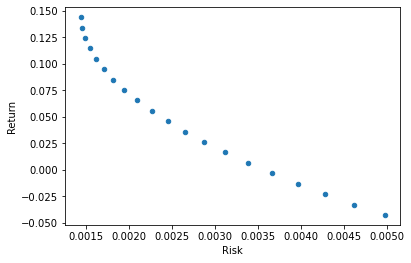

In [122]:
ef = pd.DataFrame({'Return':rets, 'Risk':vol})
ef.plot.scatter(x = 'Risk', y = 'Return')

In [109]:
ef

,Return,Risk
0,-0.042421,0.004974
1,-0.032616,0.004618
2,-0.022811,0.004281
3,-0.013006,0.003963
4,-0.003201,0.003663
5,0.006604,0.003383
6,0.016409,0.003121
7,0.026215,0.002879
8,0.036020,0.002655
9,0.045825,0.002450
